## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Car Price/car data.csv')

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
print(dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [7]:
print(dataset.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [8]:
print(dataset.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Data Preprocessing

In [9]:
X = dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = dataset['Selling_Price']

In [10]:
X.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
X.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
print(X)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


## Training the Random Forest Regression model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting new results

In [15]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 7.335,  0.43 ,  4.57 ,  8.985, 16.598,  5.3  ,  3.135,  0.443,
        3.415,  4.585,  2.875,  0.76 ,  4.86 ,  6.87 ,  7.6  , 16.55 ,
        6.295,  4.06 ,  0.408,  1.57 ,  3.49 ,  4.9  ,  5.065,  9.617,
        0.172,  0.76 ,  0.264,  0.723,  0.47 ,  3.98 ,  2.565,  6.045,
        0.468,  7.32 ,  3.28 ,  1.13 ,  5.46 ,  5.33 ,  0.217,  7.73 ,
        8.04 , 23.875,  4.845,  4.43 ,  5.86 , 10.9  ,  0.264,  0.785,
        5.38 ,  6.235,  6.597,  3.06 ,  5.035, 25.15 ,  1.17 ,  1.137,
        0.439,  2.365,  3.45 ,  2.795,  3.674])

In [16]:
Y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

## Visualizing the results

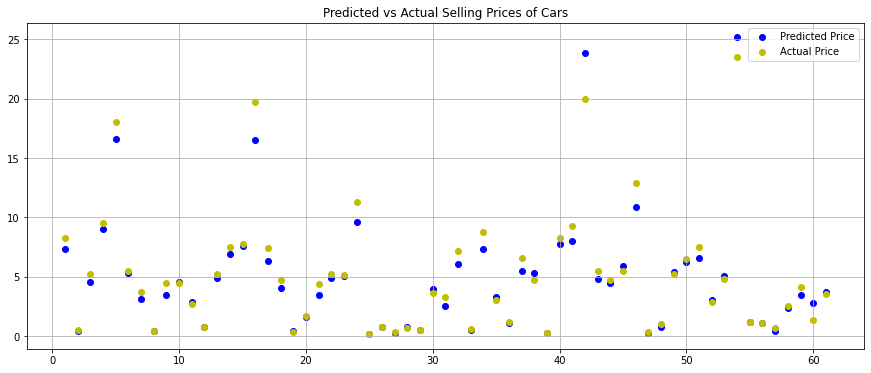

In [17]:
plt.figure(figsize=(15 ,6 ))
plt.scatter(np.arange(1,62), Y_pred, color='b', label='Predicted Price')
plt.scatter(np.arange(1,62), Y_test, color='y', label="Actual Price")
plt.grid()
plt.title('Predicted vs Actual Selling Prices of Cars')
plt.legend()
plt.show()

## Model Performance

In [18]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9643188808225094